In [2]:
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("bike").getOrCreate()
df = spark.read.option("header","true").csv("2017-fordgobike-tripdata.csv")

23/02/16 17:46:55 WARN Utils: Your hostname, murats-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.68.101 instead (on interface en0)
23/02/16 17:46:55 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/02/16 17:46:56 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


5-what is the preferred way to pay for customers and subscriber


In [4]:
table = df.groupBy("user_type").pivot("pyment").count()
table.show()

+----------+----------+-----------+
| user_type|app wallet|credit card|
+----------+----------+-----------+
|Subscriber|    204727|     204503|
|  Customer|     55334|      55136|
+----------+----------+-----------+



In [3]:
table = df.groupBy("user_type", "pyment").count()
table.show()

+----------+-----------+------+
| user_type|     pyment| count|
+----------+-----------+------+
|Subscriber| app wallet|204727|
|  Customer| app wallet| 55334|
|  Customer|credit card| 55136|
|Subscriber|credit card|204503|
+----------+-----------+------+



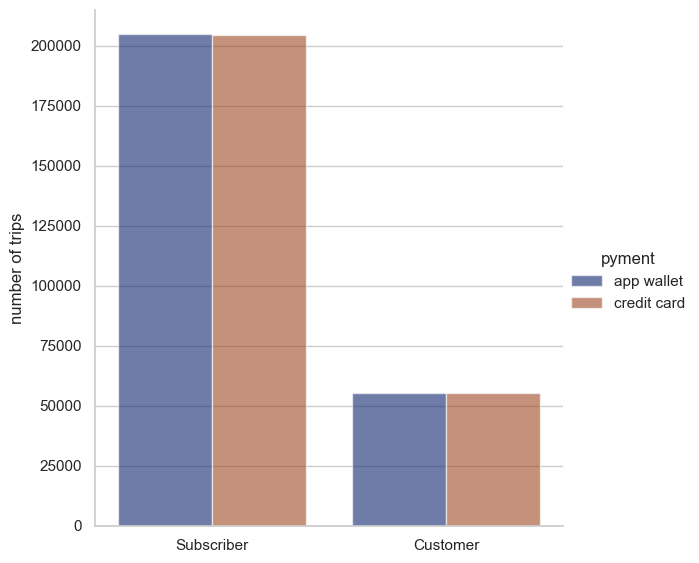

In [19]:
import seaborn as sns

g = sns.catplot(
    data=table.toPandas(), kind="bar",
    x="user_type", y="count", hue="pyment",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.set_axis_labels("", "number of trips")
